In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò®Îã§.

In [2]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

train.shape, test.shape

((7613, 5), (3263, 4))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
train.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

- You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

0    4342
1    3271
Name: target, dtype: int64


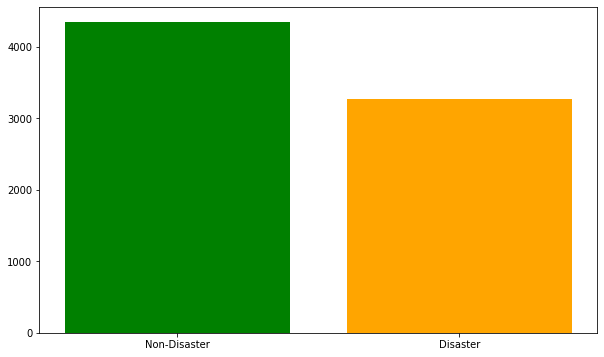

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print(train['target'].value_counts())
news_class = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, news_class, color=['green', 'orange'])

fig.show()

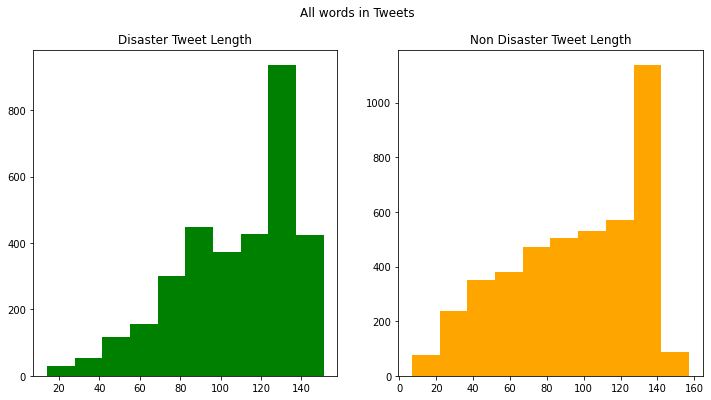

In [7]:
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color='green')
ax[0].set_title("Disaster Tweet Length")

ax[1].hist(non_disaster_tweet_len, color='orange')
ax[1].set_title("Non Disaster Tweet Length")

fig.suptitle('All words in Tweets')
plt.show()

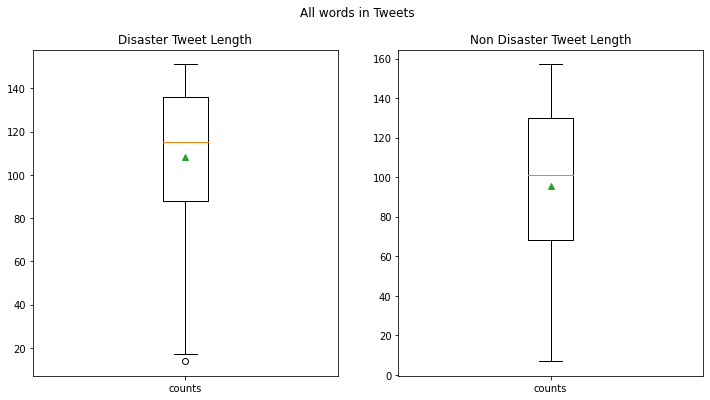

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(disaster_tweet_len, labels=['counts'], showmeans=True)
ax[0].set_title("Disaster Tweet Length")

ax[1].boxplot(non_disaster_tweet_len, labels=['counts'], showmeans=True)
ax[1].set_title("Non Disaster Tweet Length")

fig.suptitle('All words in Tweets')
plt.show()

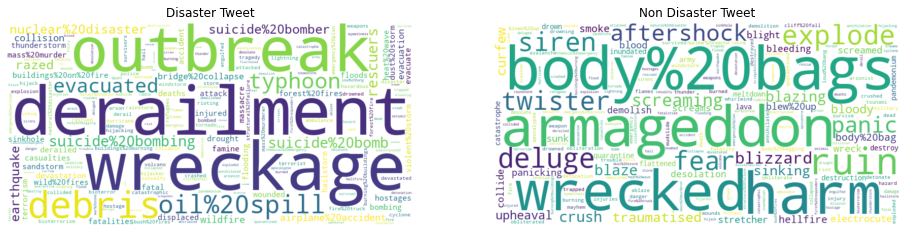

In [9]:
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)


fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Disaster Tweet")
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Non Disaster Tweet")
fig.show()

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞

In [10]:
# test_id Ï†ÄÏû• / Í≤∞Í≥ºÏ†úÏ∂ú Ïãú Ïû¨ÌôúÏö©
test_id = test['id']

for datas in [train, test] :
    datas = datas.drop(['id','keyword','location'], axis=1, inplace=True)
    
train.shape, test.shape

((7613, 2), (3263, 1))

- Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [12]:
train.head(), test.head()

(                                                text  target
 0  Our Deeds are the Reason of this #earthquake M...       1
 1             Forest fire near La Ronge Sask. Canada       1
 2  All residents asked to 'shelter in place' are ...       1
 3  13,000 people receive #wildfires evacuation or...       1
 4  Just got sent this photo from Ruby #Alaska as ...       1,
                                                 text
 0                 Just happened a terrible car crash
 1  Heard about #earthquake is different cities, s...
 2  there is a forest fire at spot pond, geese are...
 3           Apocalypse lighting. #Spokane #wildfires
 4      Typhoon Soudelor kills 28 in China and Taiwan)

## ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®Ïàò
- url Ï†úÍ±∞ Ìï®Ïàò, Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞, ÌäπÏàò Î¨∏Ïûê Ï†úÍ±∞, Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Îì±

In [14]:
# URL Ï†úÍ±∞ Ìï®Ïàò
import re

def remove_url (text):
    url = re.compile(r'https?://\S+|www\.\S+')
    # re.sub(r'https?://\S+|www\.\S+','',text)
    return url.sub(r'', text)

sample_text = 'Ï£ºÏÜå: https://www.kaggle.com/code/lospel/notebook370b725ead/edit'
remove_url(sample_text)

'Ï£ºÏÜå: '

- HTML ÌÉúÍ∑∏ Ï†úÍ±∞ÌïòÎäî Ìï®Ïàò

In [15]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

sample_text ="""<div>
<h1> Real News or Fake News </h1>
<p> Kaggle Machine Learning </p>
</div>"""

remove_html(sample_text)

'\n Real News or Fake News \n Kaggle Machine Learning \n'

In [16]:
!pip install emoji --upgrade

In [17]:
import emoji
print(emoji.emojize('Phd is very easy!!! :thumbs_up:'))

Phd is very easy!!! üëç


In [18]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

remove_emoji("Hello, üëç")

'Hello, '

- ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞

In [20]:
def remove_punct(text):
    return re.sub("[^a-zA-Z]"," ",text)

sample_text = "Hello, #Outbreak, #Earthquake, May I have one question?"
remove_punct(sample_text)

'Hello   Outbreak   Earthquake  May I have one question '

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
print(len(stopwords.words('english')))

179


In [31]:
stopwords.words('english')[:10] + ["happy"]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 'happy']

In [27]:
def data_cleansing(text, remove_stopwords=False) :
    # remove url
    url = re.compile(r'https?://\S+|www\.\S+')
    reg_text = url.sub(r'', text)
    
    # remove html
    html = re.compile(r'<.*?>')
    reg_text = html.sub(r'',reg_text)
    
    # remove emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    reg_text = emoji_pattern.sub(r'', reg_text)
    
    # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    reg_text = re.sub("[^a-zA-Z]"," ",reg_text)
    
    # Lowercase
    reg_text = reg_text.lower().split()
    
    # Î∂àÏö©Ïñ¥
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        
        # ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î∂àÏö©Ïñ¥ ÏÇ¨Ï†ÑÏùÑ Íµ¨Ï∂ï
#         stops = stops + [# Î∂àÏö©Ïñ¥ Ï∂îÍ∞Ä]

        reg_text = [word for word in reg_text if not word in stops]
        reg_text = ' '.join(reg_text)
        
    else :
        reg_text = ' '.join(reg_text)
        
    return reg_text

In [28]:
clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(lambda x : data_cleansing(x, remove_stopwords=True))

In [29]:
train.head(5)

text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   

                                        cleaned_text  
0       deeds reason earthquake may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...  
3  people receive wildfires evacuation orders cal...  
4  got sent photo ruby alaska smoke wildfires pou...

In [30]:
test.head(5)

text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot pond, geese are...   
3           Apocalypse lighting. #Spokane #wildfires   
4      Typhoon Soudelor kills 28 in China and Taiwan   

                                        cleaned_text  
0                        happened terrible car crash  
1  heard earthquake different cities stay safe ev...  
2  forest fire spot pond geese fleeing across str...  
3              apocalypse lighting spokane wildfires  
4                typhoon soudelor kills china taiwan

## Tfidf Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0.01, max_df=0.5, sublinear_tf = True)
X = tv.fit_transform(train['cleaned_text']).todense()
y = train['target'].values

X.shape, y.shape

((7613, 69), (7613,))

In [34]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    X, y, test_size=0.3, random_state=42
)

train_input.shape, train_target.shape, val_input.shape, val_target.shape

((5329, 69), (5329,), (2284, 69), (2284,))

In [38]:
# Î™®Îç∏ÎßÅ
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight='balanced')
lgs.fit(train_input,train_target)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LogisticRegression(class_weight='balanced')

In [39]:
import numpy as np

test_tv = tv.transform(test['cleaned_text']).toarray()
print(test_tv.shape)

(3263, 69)


## ÏòàÏ∏°ÏùÑ Íµ¨ÌïòÏûê.

In [47]:
test_preds = lgs.predict(test_tv)
print(test_preds)
submission = pd.DataFrame({'id':test_id,'target':test_preds})
# submission.head()
submission.tail()

[1 0 1 ... 0 0 1]


id  target
3258  10861       0
3259  10865       1
3260  10868       0
3261  10874       0
3262  10875       1

In [48]:
submission_test=pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
# submission_test.head()
submission_test.tail()

id  target
3258  10861       0
3259  10865       0
3260  10868       0
3261  10874       0
3262  10875       0

In [50]:
submission.to_csv("submission.csv", index=False)